# 1.4.15 Image Segmentation with Watershed Algorithm

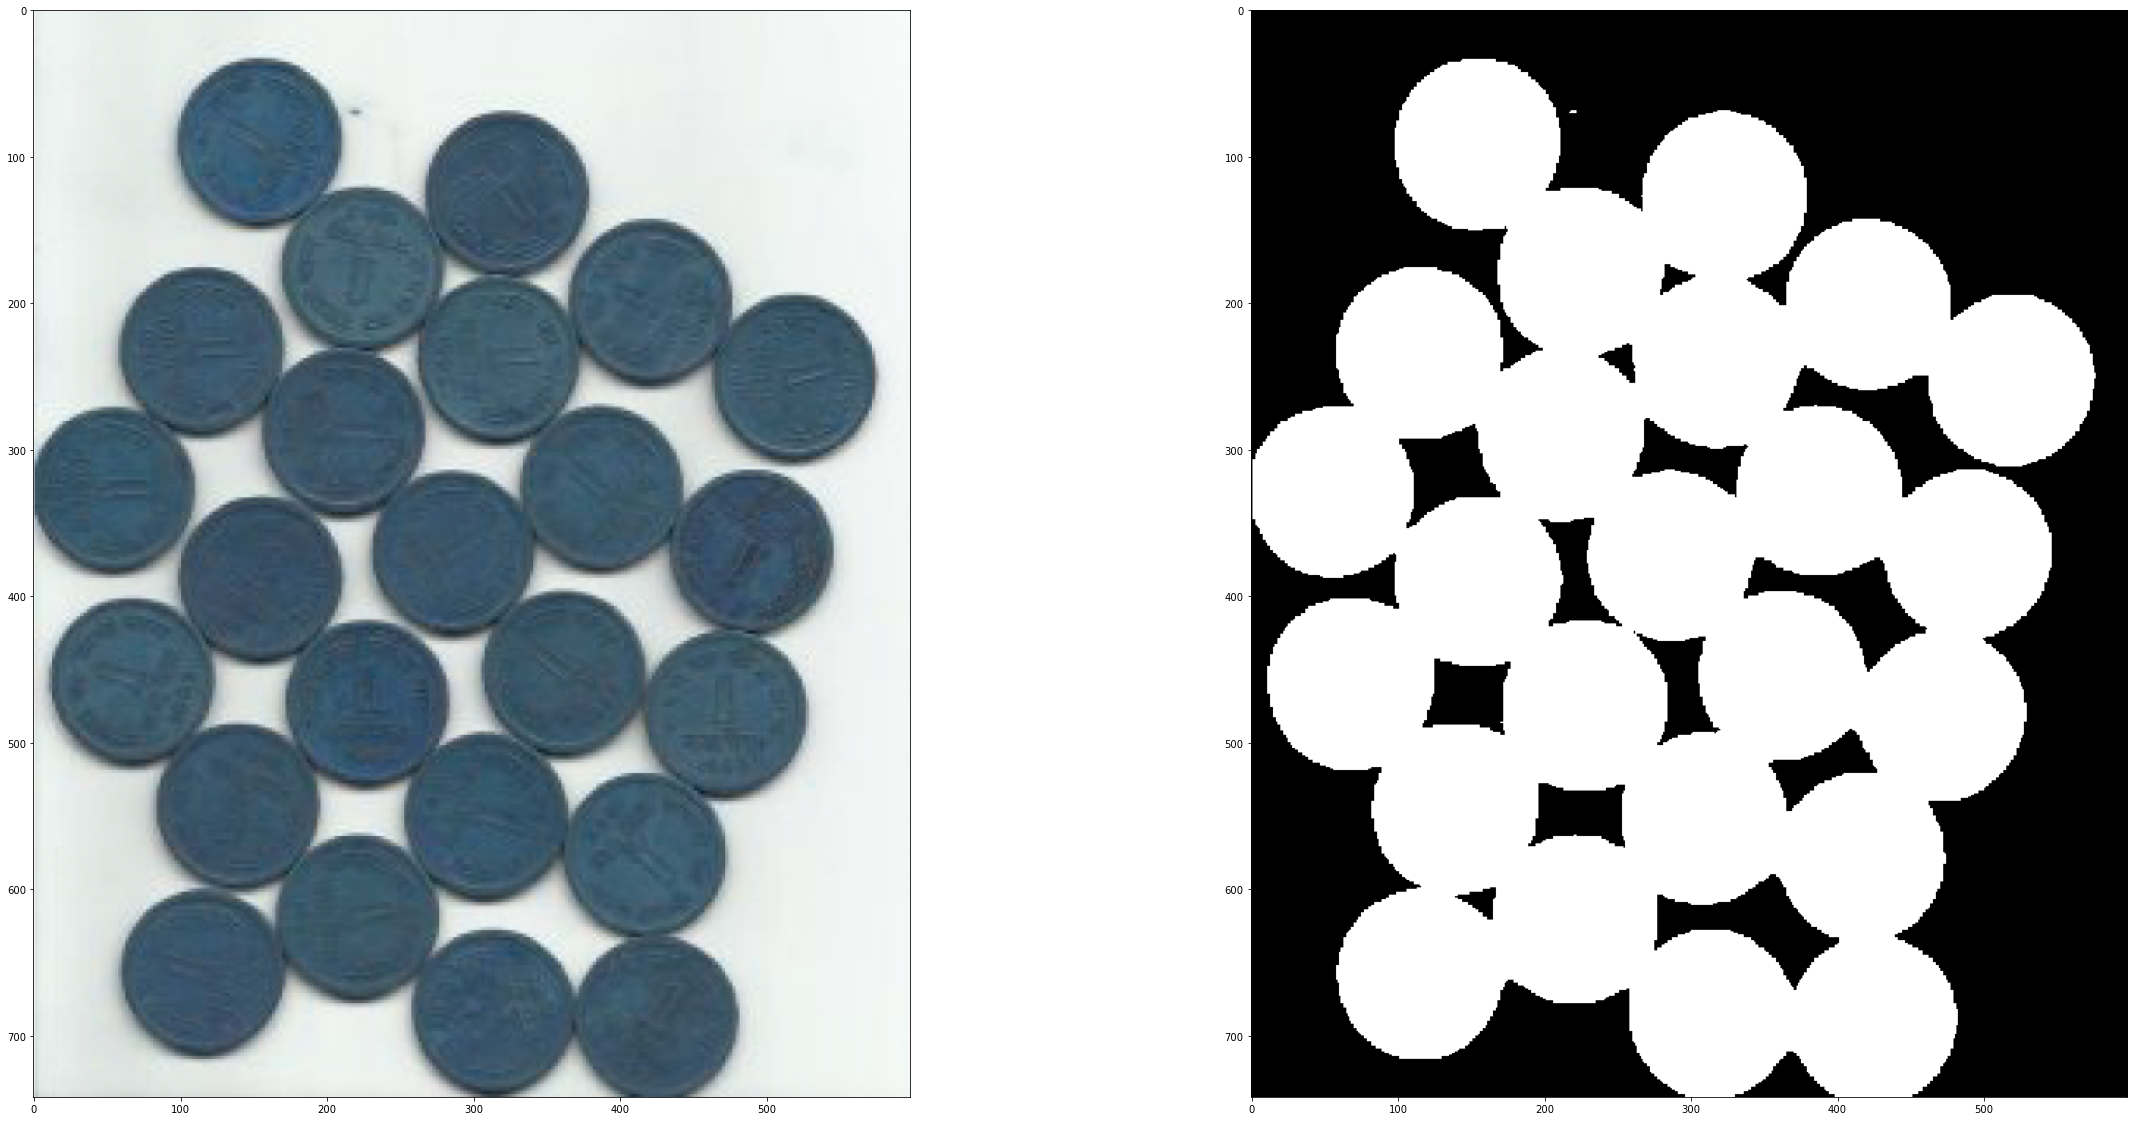

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coin2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=[40,20])
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.subplot(122),plt.imshow(thresh,cmap = 'gray')
plt.show()

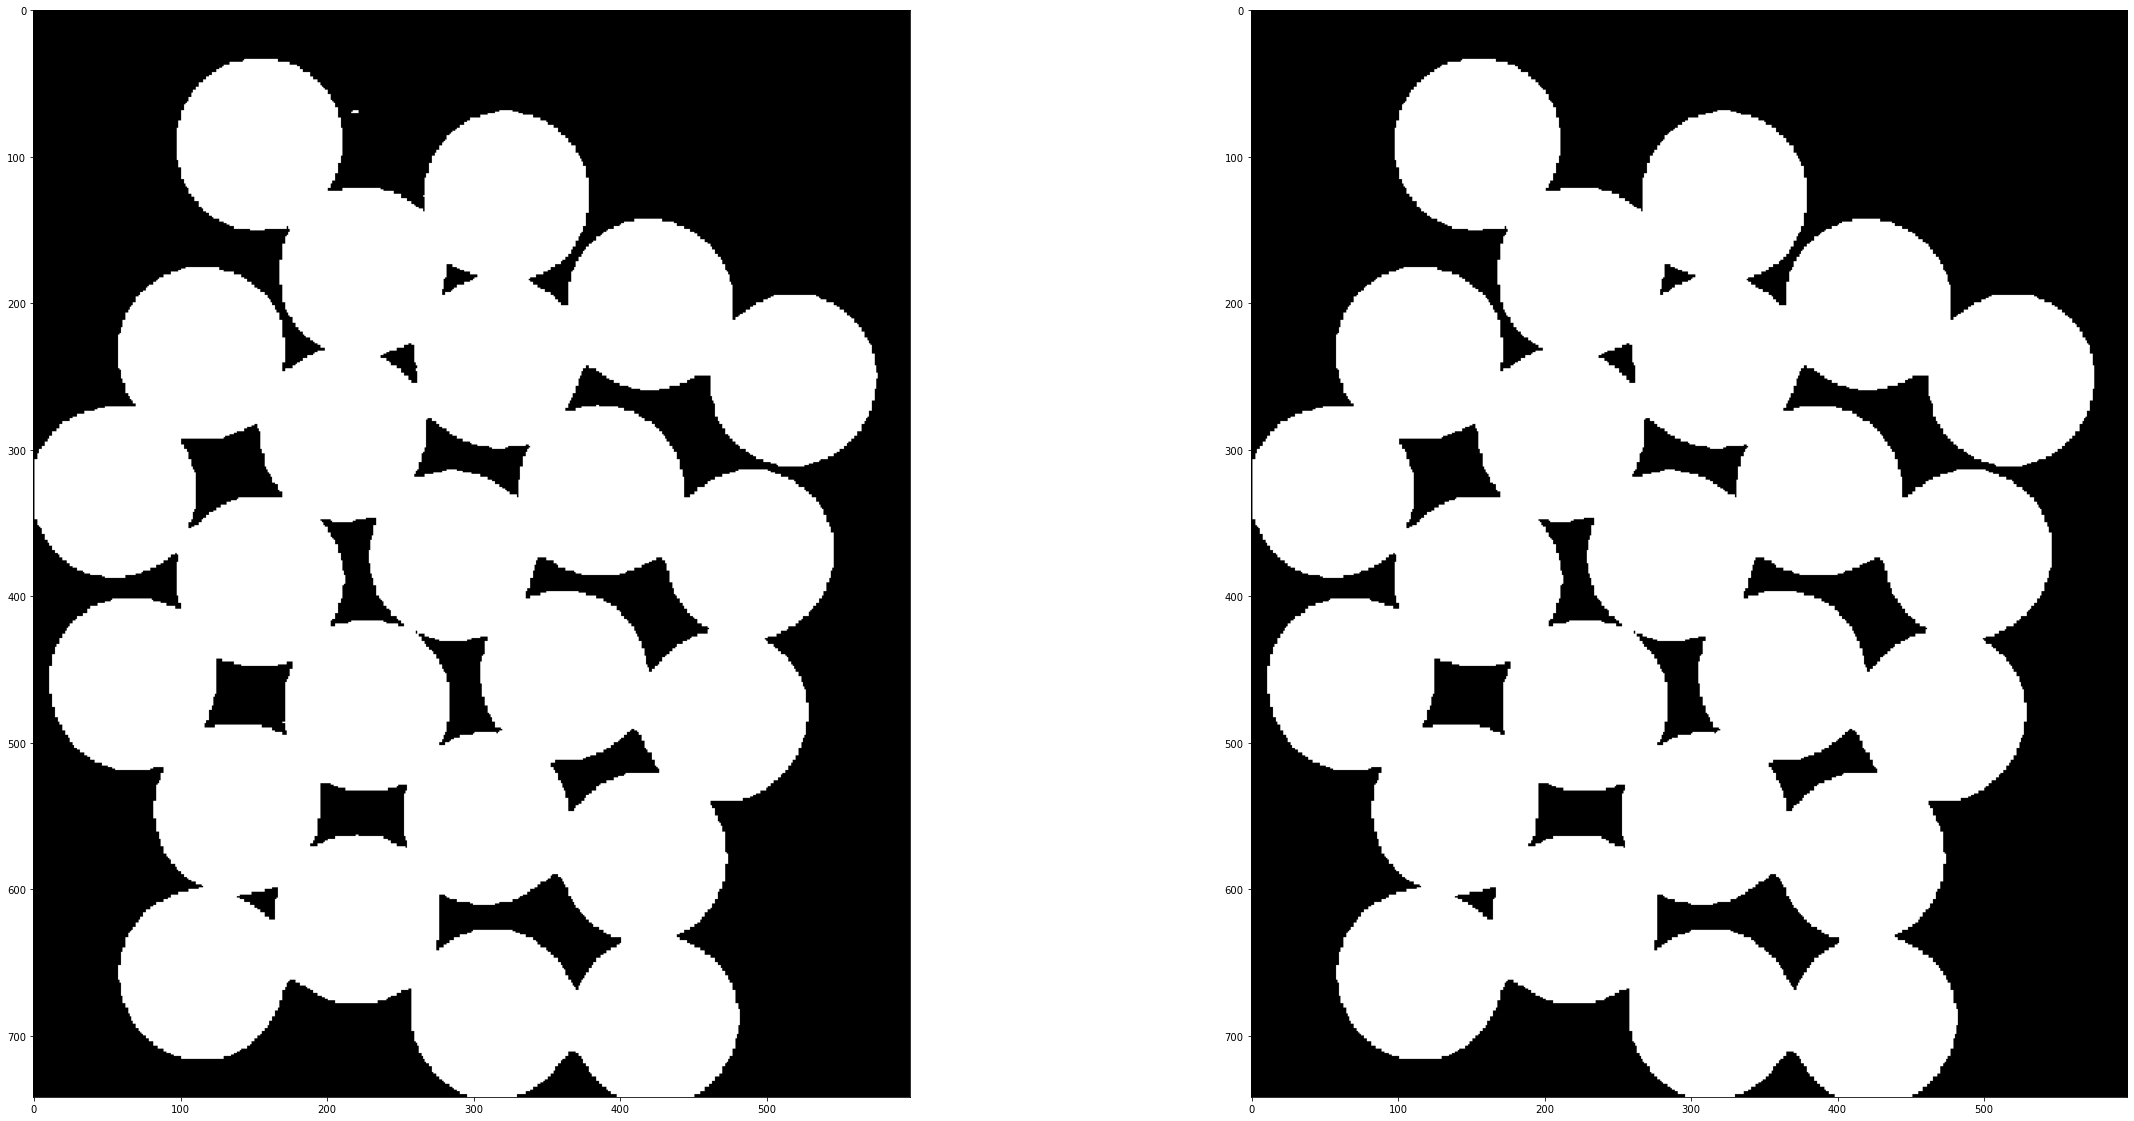

In [25]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.figure(figsize=[40,20])
plt.subplot(121),plt.imshow(thresh,cmap = 'gray')
plt.subplot(122),plt.imshow(opening,cmap = 'gray')
plt.show()

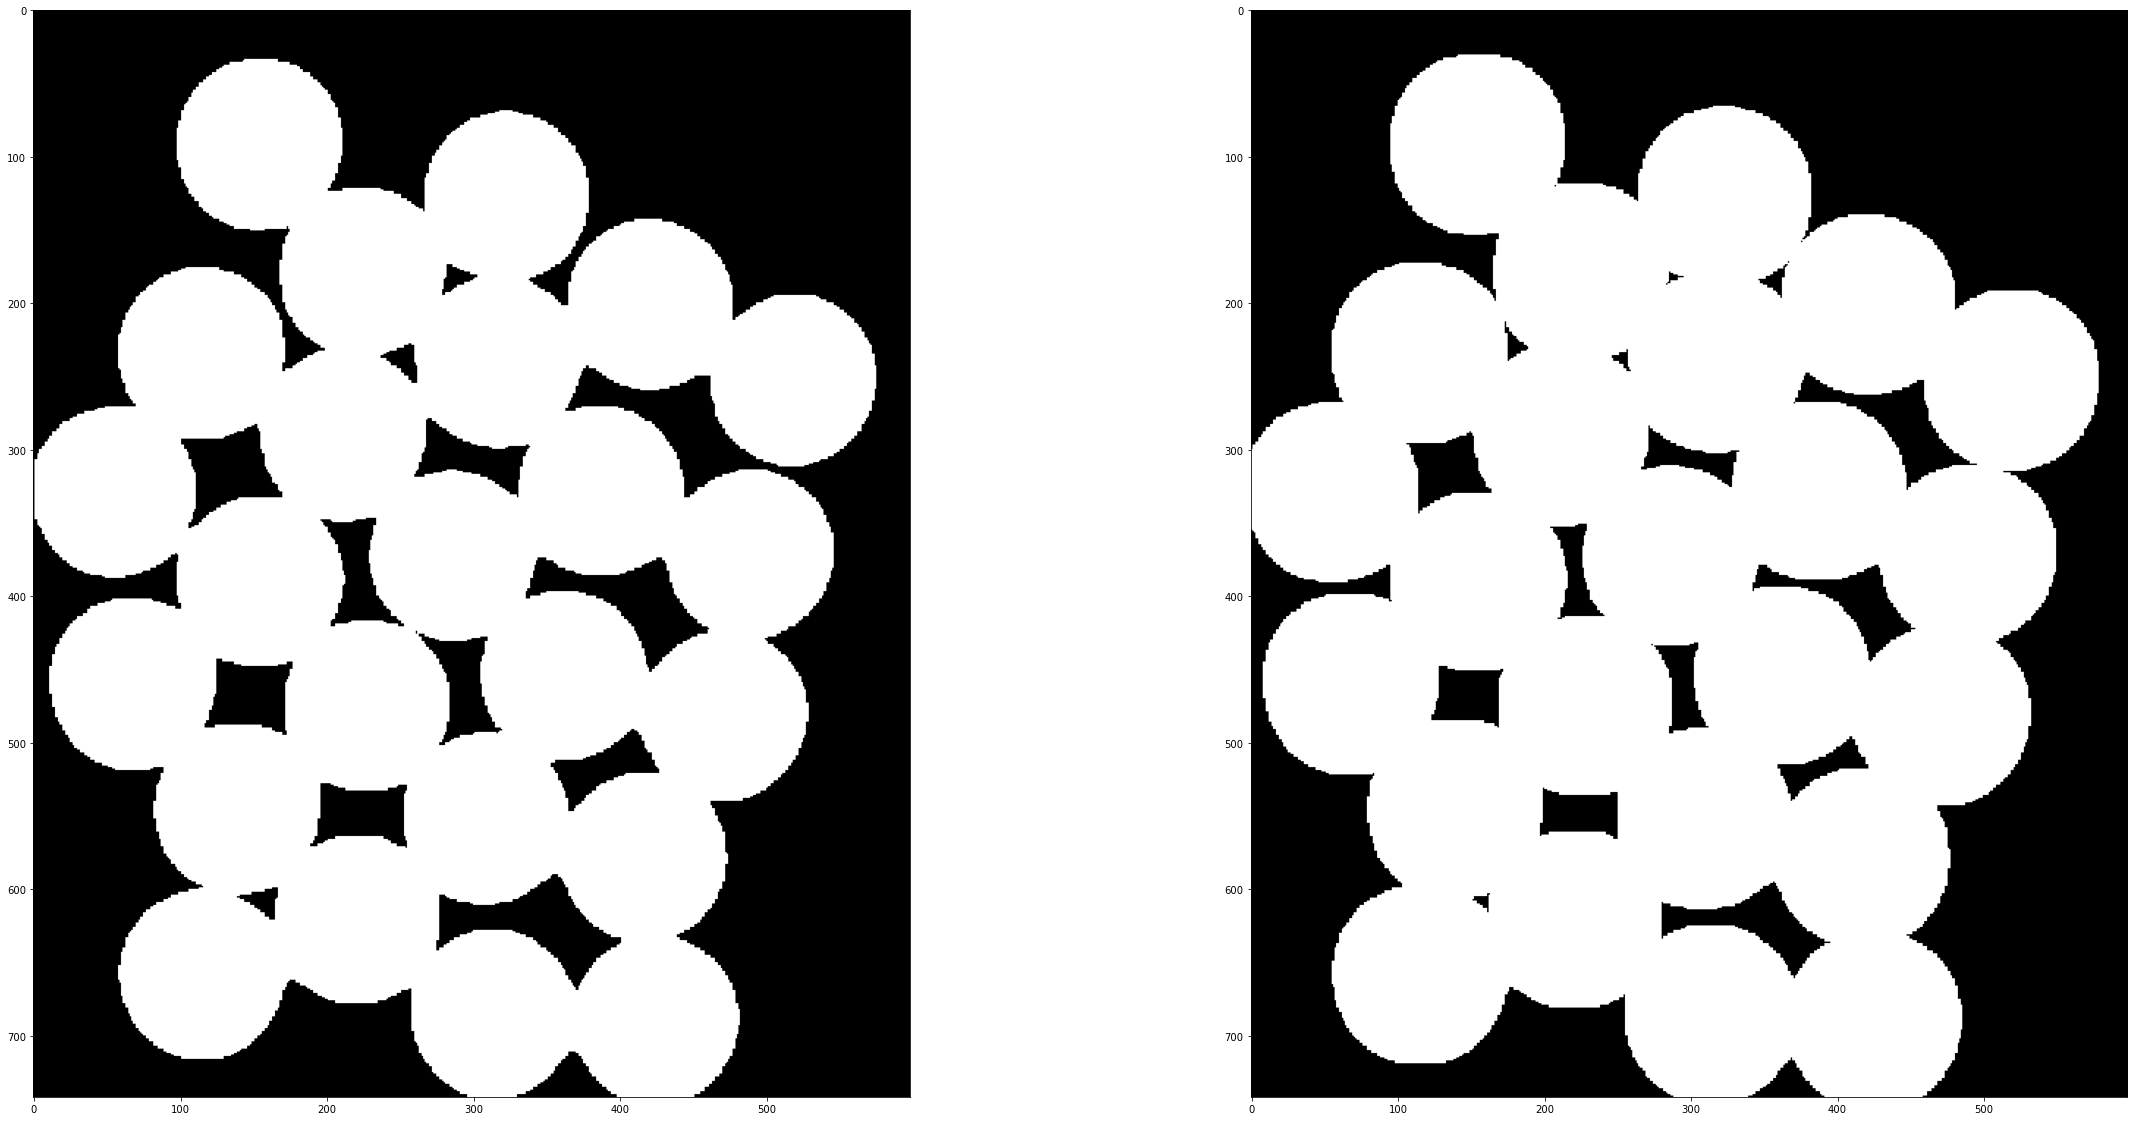

In [23]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.figure(figsize=[40,20])
plt.subplot(121),plt.imshow(opening,cmap = 'gray')
plt.subplot(122),plt.imshow(sure_bg,cmap = 'gray')
plt.show()

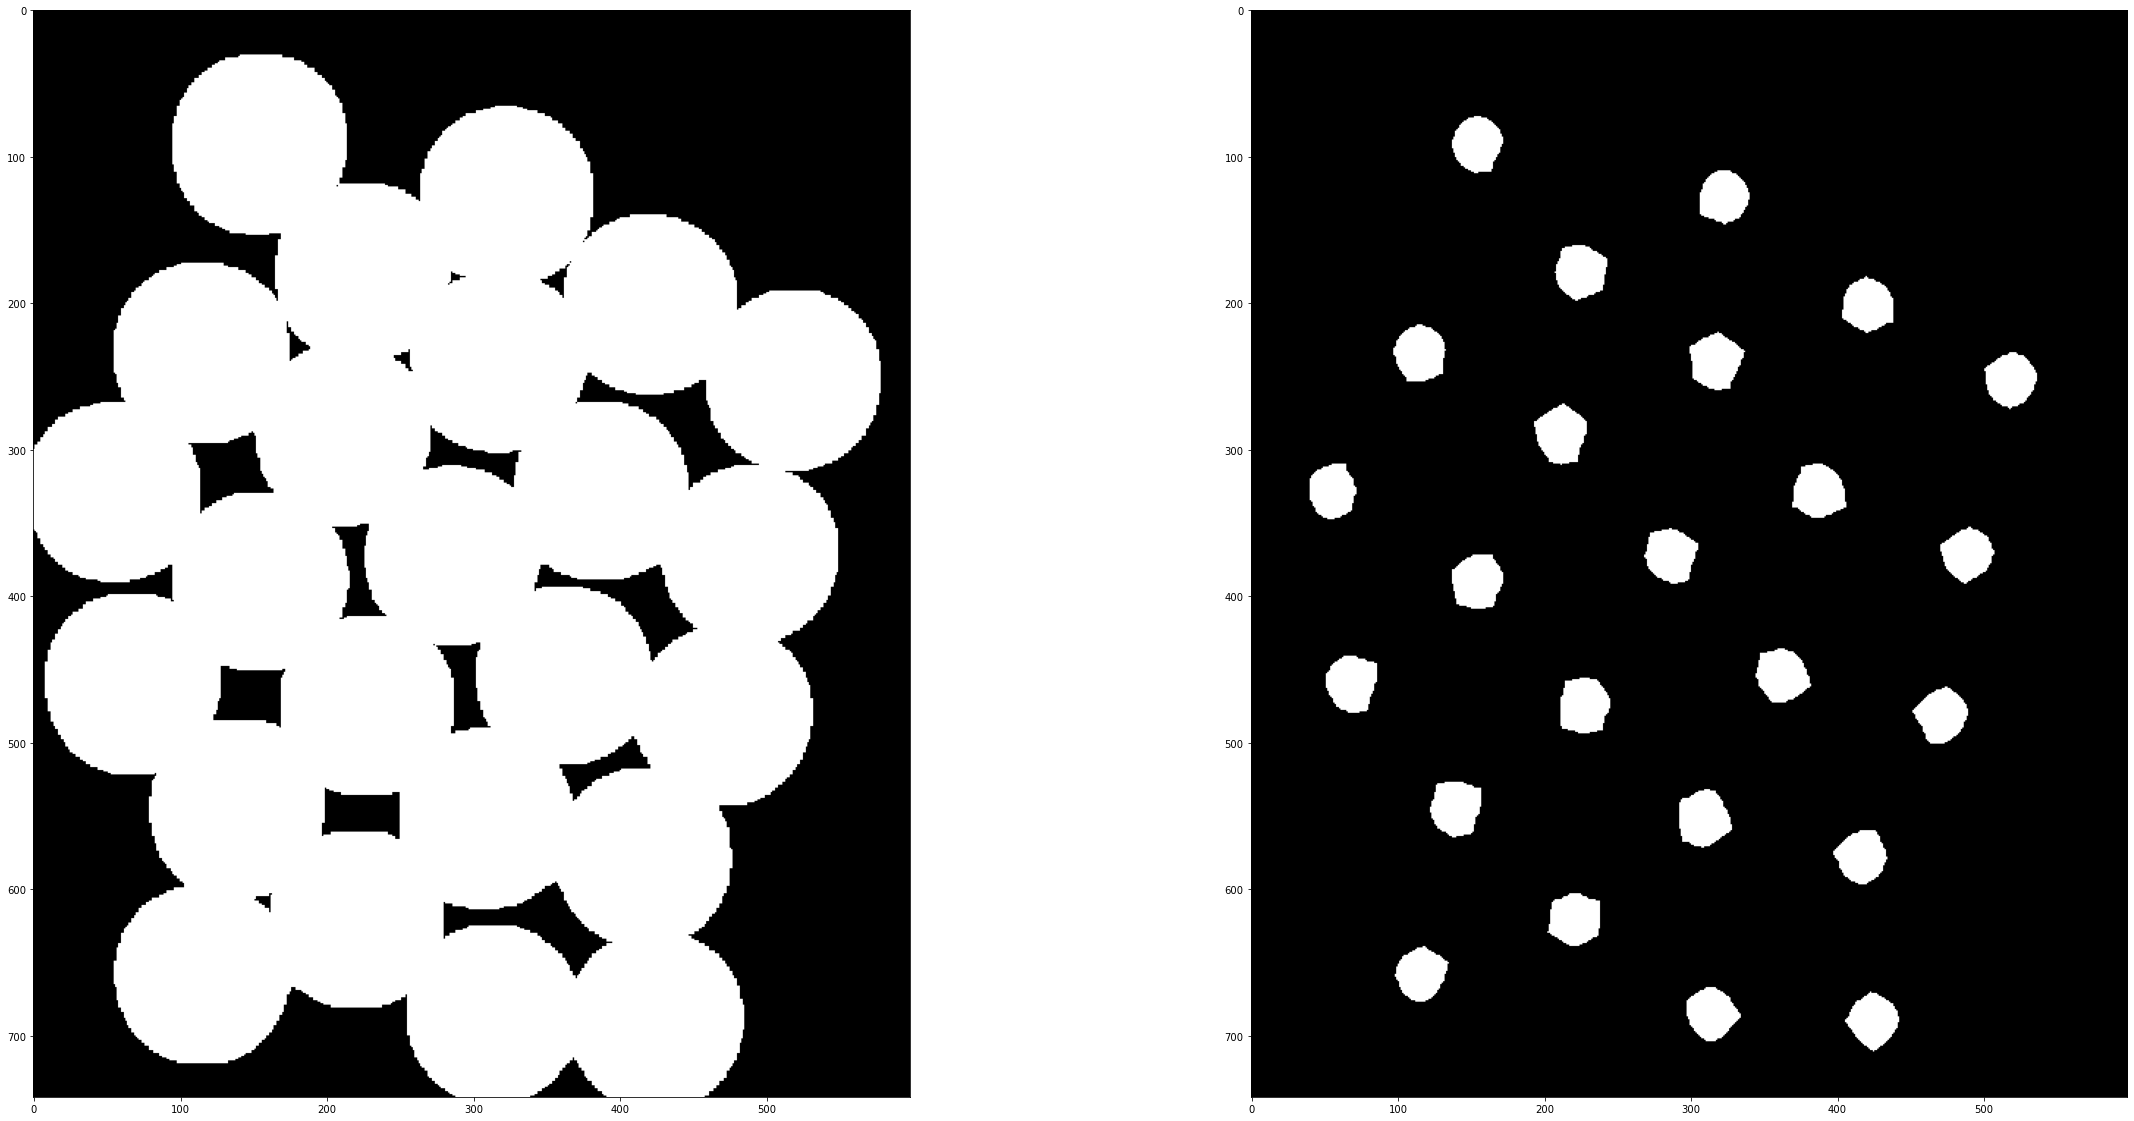

In [26]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.figure(figsize=[40,20])
plt.subplot(121),plt.imshow(sure_bg,cmap = 'gray')
plt.subplot(122),plt.imshow(sure_fg,cmap = 'gray')
plt.show()

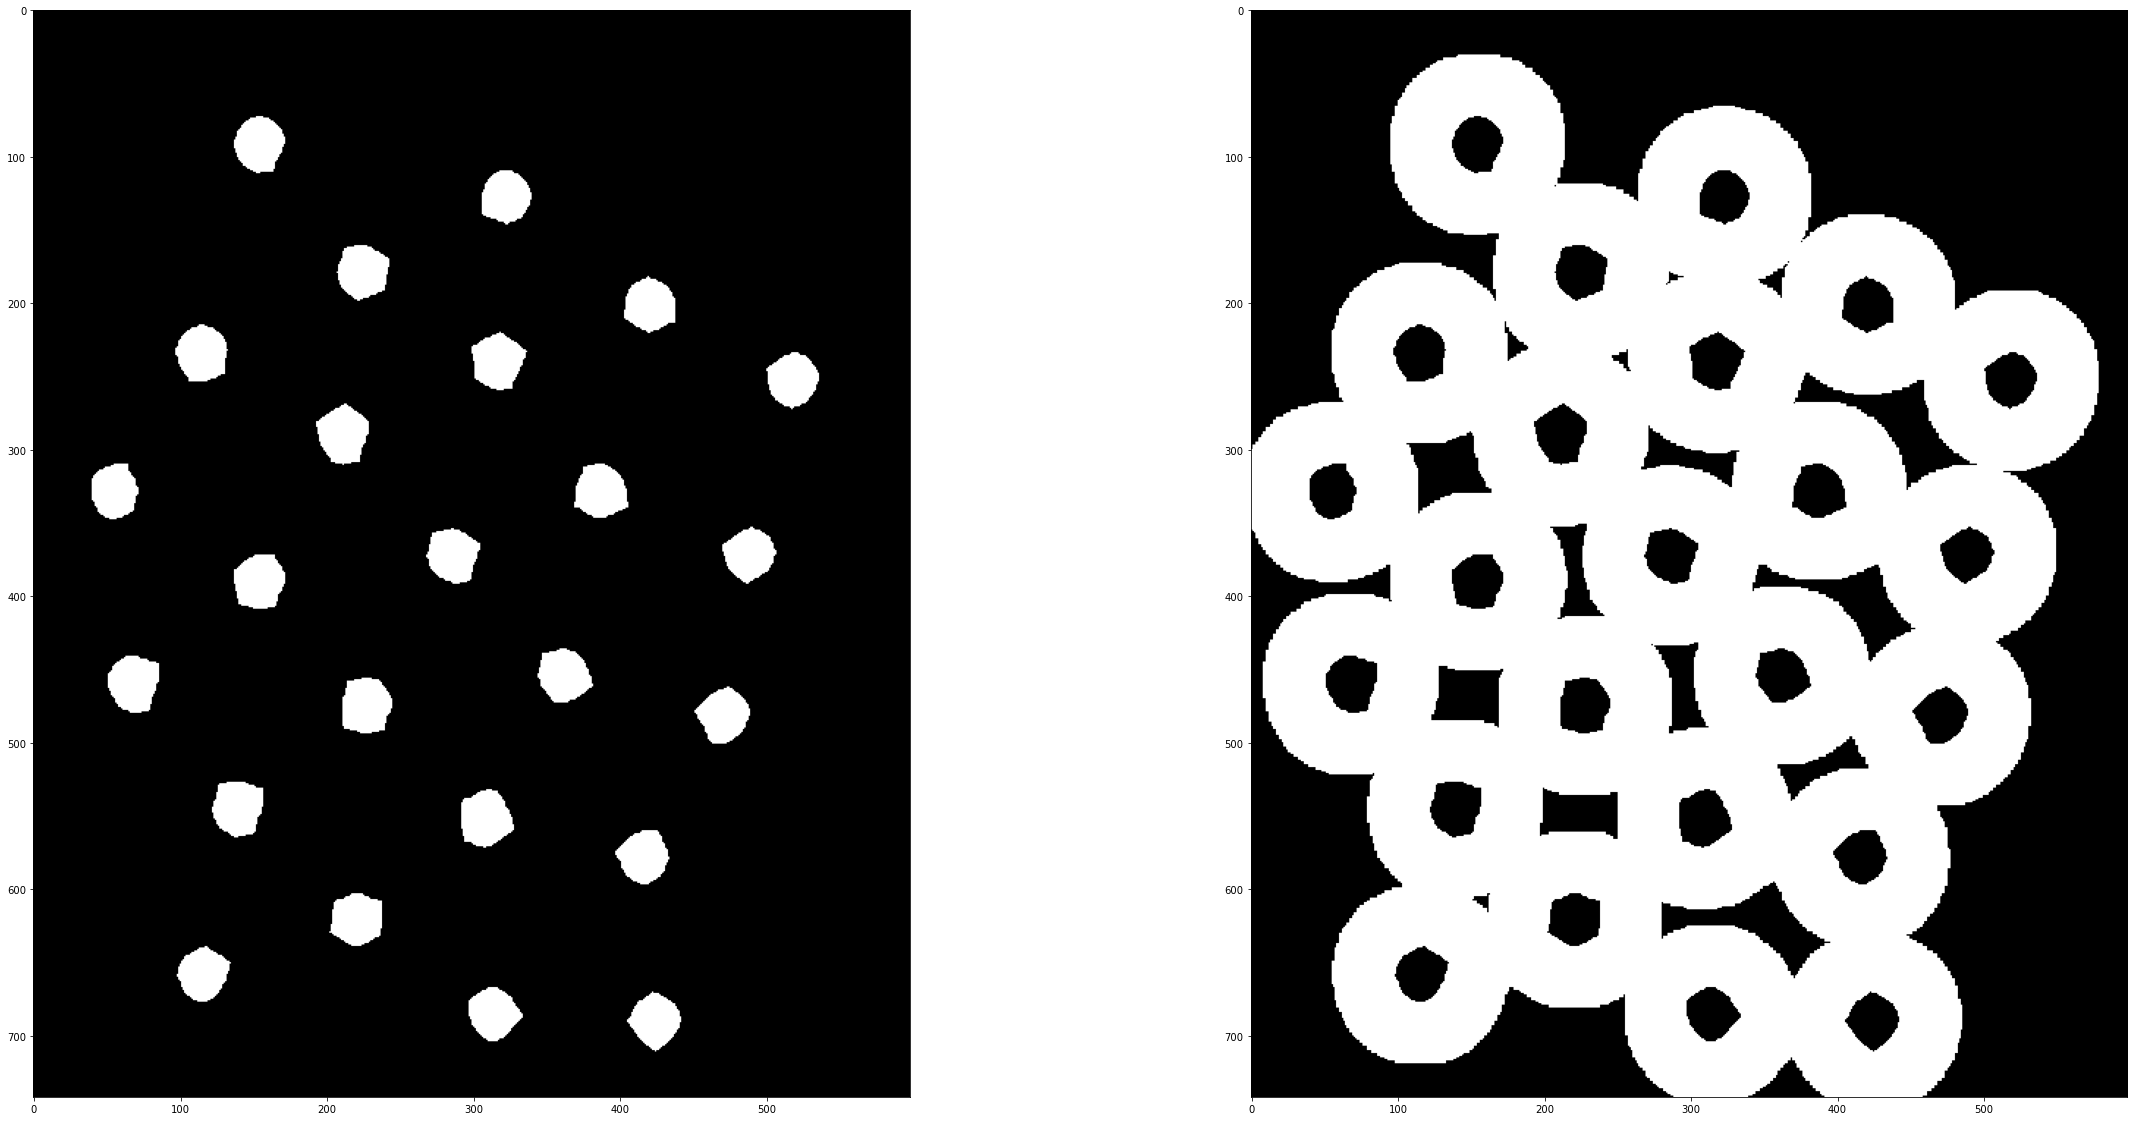

In [27]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.figure(figsize=[40,20])
plt.subplot(121),plt.imshow(sure_fg,cmap = 'gray')
plt.subplot(122),plt.imshow(unknown,cmap = 'gray')
plt.show()

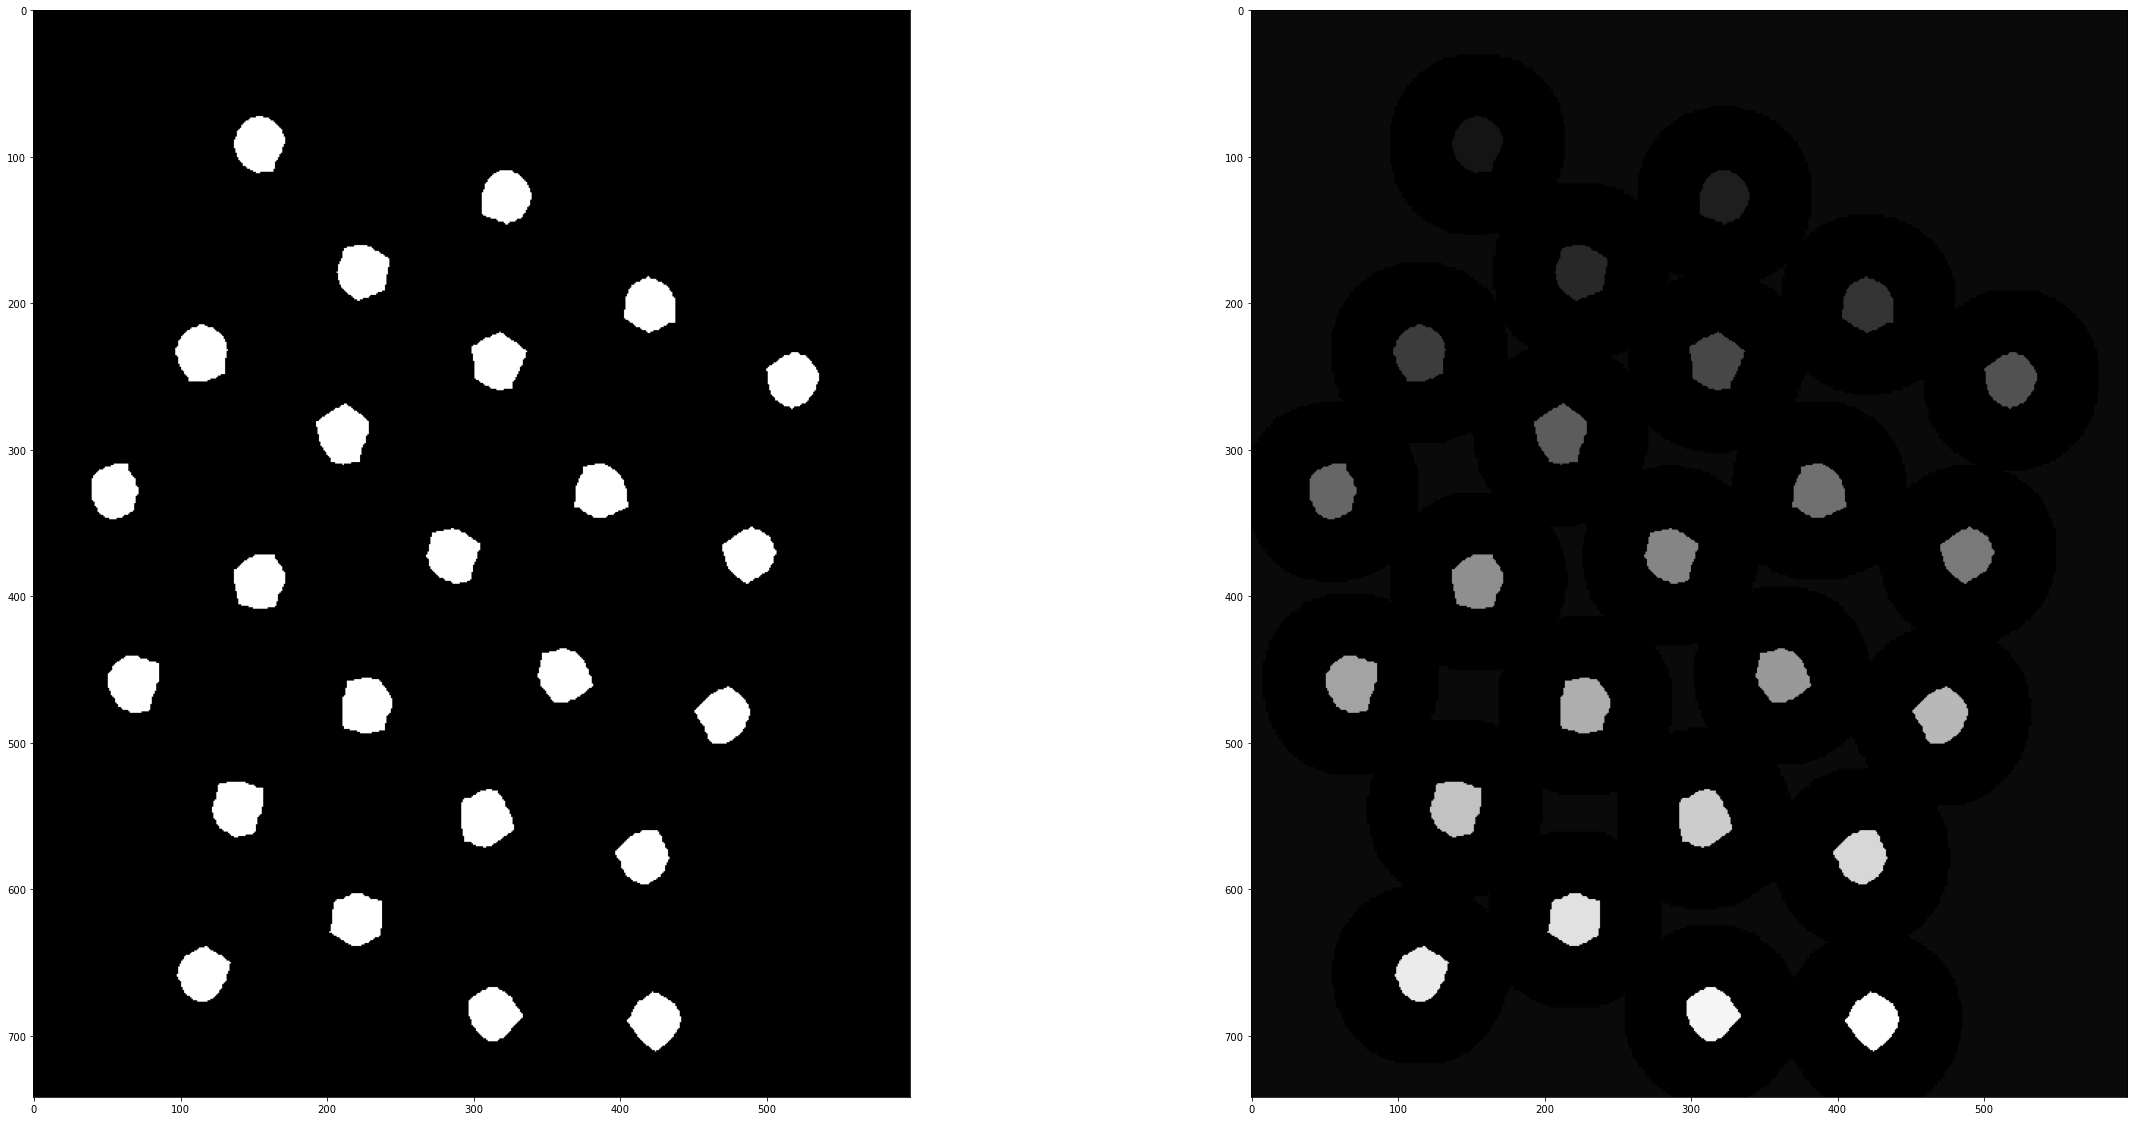

In [28]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.figure(figsize=[40,20])
plt.subplot(121),plt.imshow(sure_fg,cmap = 'gray')
plt.subplot(122),plt.imshow(markers,cmap = 'gray')
plt.show()

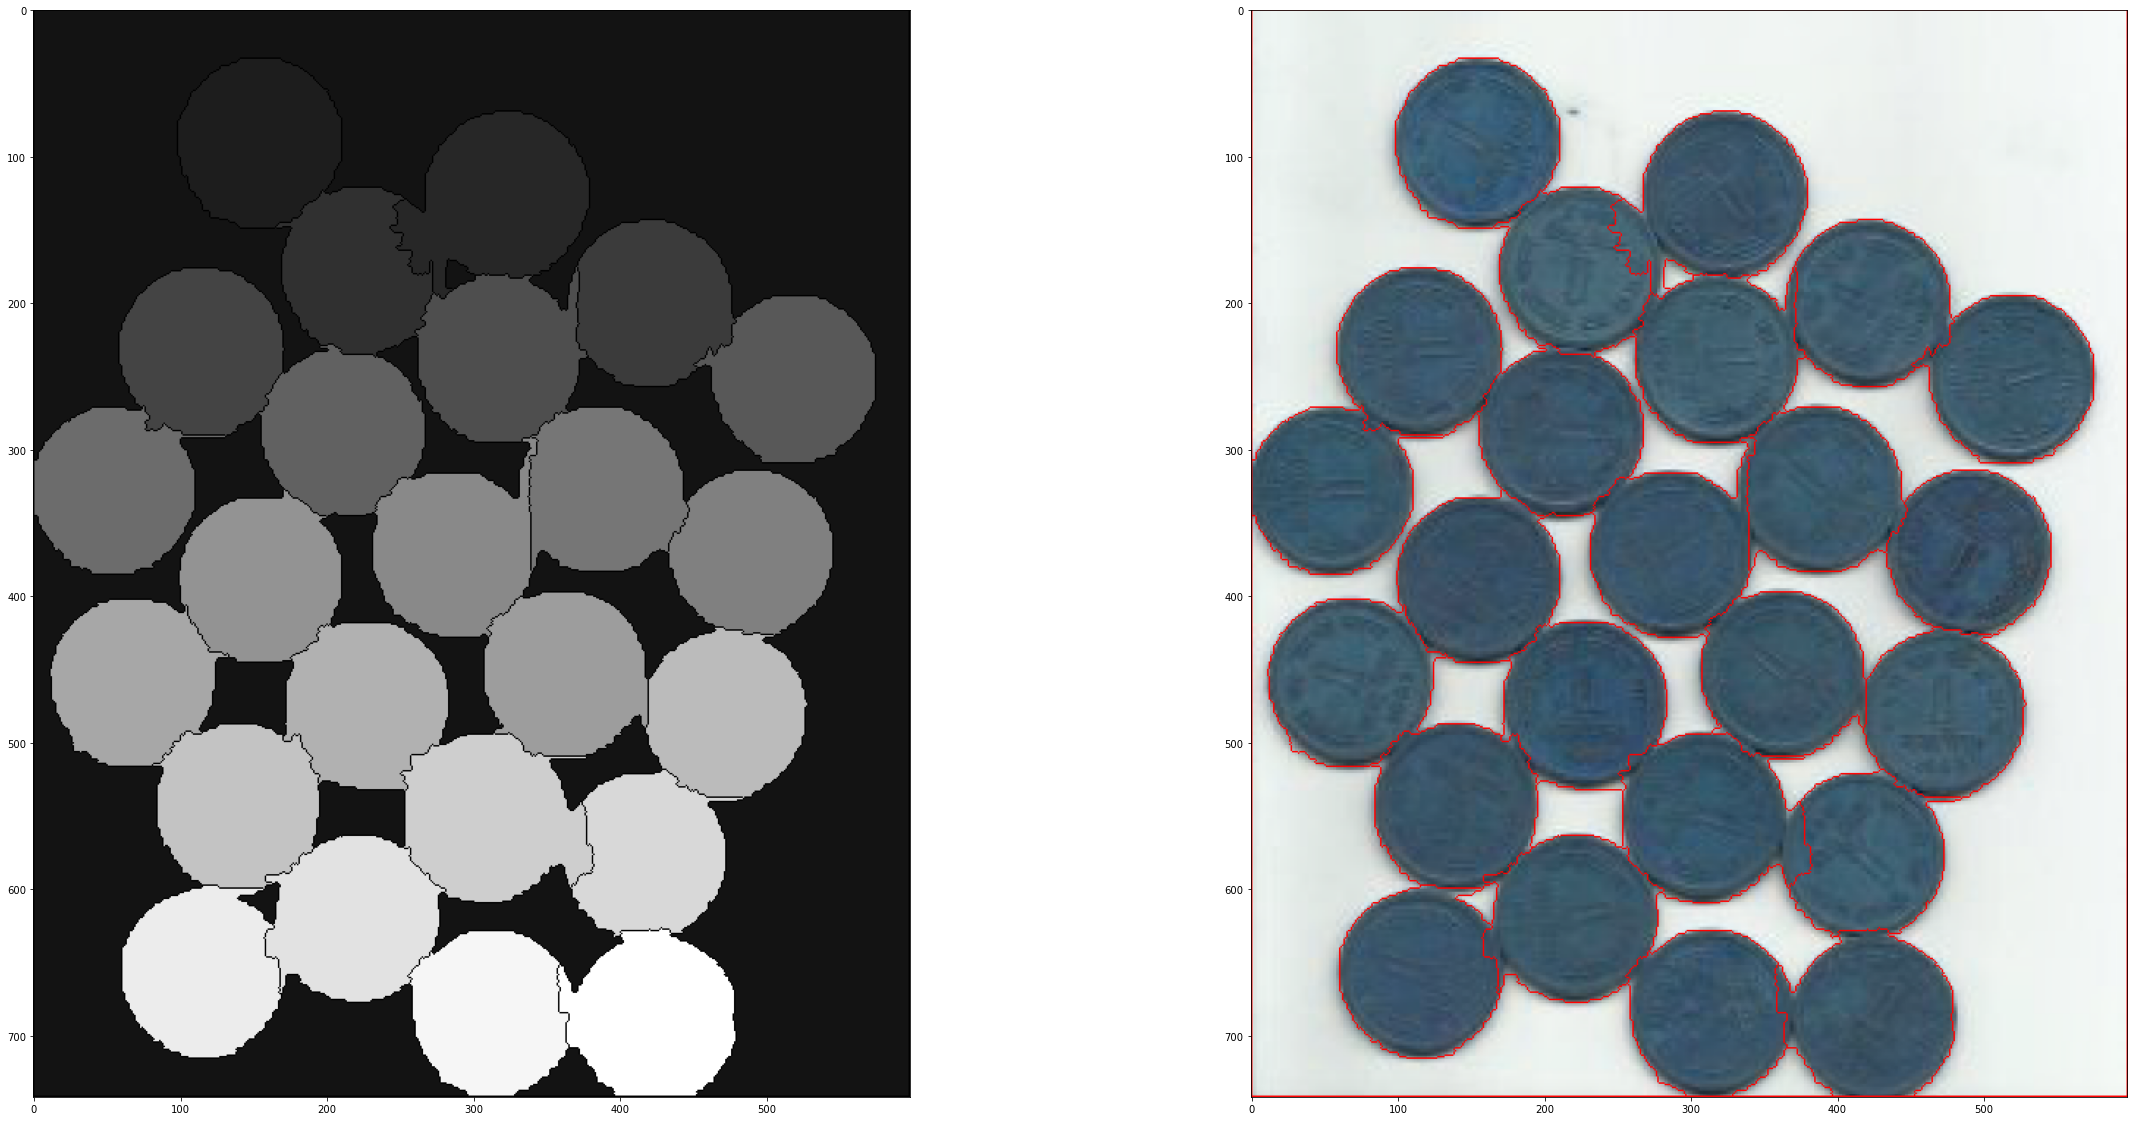

In [32]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.figure(figsize=[40,20])
plt.subplot(121),plt.imshow(markers,cmap = 'gray')
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.show()
#영역을 각각만들어 겹치는부분을 알수있음

In [31]:
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()